**Mandatory Section**

**A1**

In [2]:
# Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reaading the dataset from the CSV file
df=pd.read_csv('/content/Telecom_data.csv')

In [4]:
# Displaying first 5 rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Checking for null values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# All the columns which contain categorical data, to perform one hot encoding
categorical_col=['gender', 'SeniorCitizen', 'Partner','Dependents','tenure','PhoneService',
'MultipleLines', 'InternetService','OnlineSecurity',
'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']

In [7]:
# Checking for how many unique values are there in each categorical column
for i in categorical_col:
  print(i)
  print(df[i].unique())
  print(df[i].nunique())
  print()

gender
['Female' 'Male']
2

SeniorCitizen
[0 1]
2

Partner
['Yes' 'No']
2

Dependents
['No' 'Yes']
2

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
73

PhoneService
['No' 'Yes']
2

MultipleLines
['No phone service' 'No' 'Yes']
3

InternetService
['DSL' 'Fiber optic' 'No']
3

OnlineSecurity
['No' 'Yes' 'No internet service']
3

OnlineBackup
['Yes' 'No' 'No internet service']
3

DeviceProtection
['No' 'Yes' 'No internet service']
3

TechSupport
['No' 'Yes' 'No internet service']
3

StreamingTV
['No' 'Yes' 'No internet service']
3

StreamingMovies
['No' 'Yes' 'No internet service']
3

Contract
['Month-to-month' 'One year' 'Two year']
3

PaperlessBilling
['Yes' 'No']
2

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
4

Churn
['No' 'Yes']
2



In [8]:
# Replacing the 'No phone service' with 'No', for better consistency in the data
for col in categorical_col:
  if df[col].eq('No phone service').any():
    df[col]=df[col].replace({'No phone service': 'No'})

In [9]:
# Dropping off the customerID
df = df.drop('customerID', axis=1)

In [10]:
# One - hot encoding for the categorical data
encoded_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner','Dependents','PhoneService',
'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']], drop_first=True)

In [11]:
# Displaying the one-hot encoded data (first 5 rows)
encoded_df.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [12]:
# Extracting all the feature vectors for which one-hot encoding was not performed
int_df = df[['MonthlyCharges','TotalCharges']]
df_final = pd.concat([int_df, encoded_df], axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         7043 non-null   float64
 1   TotalCharges                           7043 non-null   object 
 2   SeniorCitizen                          7043 non-null   int64  
 3   gender_Male                            7043 non-null   uint8  
 4   Partner_Yes                            7043 non-null   uint8  
 5   Dependents_Yes                         7043 non-null   uint8  
 6   PhoneService_Yes                       7043 non-null   uint8  
 7   MultipleLines_Yes                      7043 non-null   uint8  
 8   InternetService_Fiber optic            7043 non-null   uint8  
 9   InternetService_No                     7043 non-null   uint8  
 10  OnlineSecurity_No internet service     7043 non-null   uint8  
 11  Onli

In [13]:
if df_final['TotalCharges'].eq(' ').any():
  df_final['TotalCharges'] = df_final['TotalCharges'].replace({' ': 0})
df_final['TotalCharges'] = df_final['TotalCharges'].astype(float)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         7043 non-null   float64
 1   TotalCharges                           7043 non-null   float64
 2   SeniorCitizen                          7043 non-null   int64  
 3   gender_Male                            7043 non-null   uint8  
 4   Partner_Yes                            7043 non-null   uint8  
 5   Dependents_Yes                         7043 non-null   uint8  
 6   PhoneService_Yes                       7043 non-null   uint8  
 7   MultipleLines_Yes                      7043 non-null   uint8  
 8   InternetService_Fiber optic            7043 non-null   uint8  
 9   InternetService_No                     7043 non-null   uint8  
 10  OnlineSecurity_No internet service     7043 non-null   uint8  
 11  Onli

In [14]:
df_final['Churn_Yes'].value_counts()
features = df_final.drop(columns = 'Churn_Yes', axis=1)
target = df_final['Churn_Yes']
df_final.head()

,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,29.85,29.85,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,56.95,1889.50,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,53.85,108.15,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,42.30,1840.75,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,70.70,151.65,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [15]:
# Calculating the mean and spread for each class
class_means = df_final.groupby('Churn_Yes').mean()
class_spread = df_final.groupby('Churn_Yes').std()

print("\n The mean for each class of each feature is-")
print(class_means)

print("\n The standard deviation for each class of each feature is-")
print(class_spread)


 The mean for each class of each feature is-
           MonthlyCharges  TotalCharges  SeniorCitizen  gender_Male  \
Churn_Yes                                                             
0               61.265124   2549.911442       0.128721     0.507344   
1               74.441332   1531.796094       0.254682     0.497592   

           Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  \
Churn_Yes                                                                     
0             0.528218        0.344801          0.901044           0.409934   
1             0.357945        0.174425          0.909042           0.454789   

           InternetService_Fiber optic  InternetService_No  ...  \
Churn_Yes                                                   ...   
0                             0.347700            0.273096  ...   
1                             0.693954            0.060460  ...   

           StreamingTV_No internet service  StreamingTV_Yes  \
Churn_Yes           

In [16]:
# Calculating the distance between mean vectors between classes

# class_means contains the mean vectors for each class
# Extracts the mean vector for class 1 and class 0 from the class_means
centroid1 = class_means.loc[1].values
centroid2 = class_means.loc[0].values
interclass_distance = np.linalg.norm(centroid1 - centroid2) # np.linalg.norm() function computes the L2 norm of the vector difference.
print("\nInterclass Distance between mean vectors:", interclass_distance)


Interclass Distance between mean vectors: 1018.2010378260981


In [17]:
# Calculating intraclass distances

# List to store intraclass distances for each class
intraclass_distances = []
for churn_class in df_final['Churn_Yes'].unique(): # Loop through unique classes in the 'Churn_Yes' column
    class_data = df_final[df_final['Churn_Yes'] == churn_class].drop(columns=['Churn_Yes'])  # Extract data for the current class and exclude the 'Churn_Yes' column
    class_centroid = class_means.loc[churn_class].values # Extract the centroid (mean vector) for the current class
    class_data_values = class_data.values # Extract the feature values for the current class
    class_distance = np.linalg.norm(class_data_values - class_centroid, axis=1) # Calculate the Euclidean distance between each data point and the class centroid
    intraclass_distances.append(class_distance.mean()) # Calculate the mean distance for the current class
print("\nIntraclass Distances:\n", pd.Series(intraclass_distances, index=df_final['Churn_Yes'].unique()))


Intraclass Distances:
 0    1989.036086
1    1479.261497
dtype: float64


**A2**

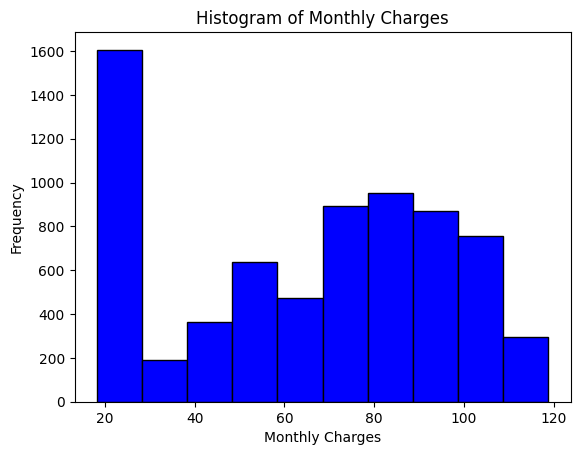

Mean Monthly Charges: 64.76169246059918
Variance of Monthly Charges: 905.2823796146344


In [18]:
# Extracting the data for MonthlCharges and converting it to list
monthly_charges_data = df_final['MonthlyCharges'].tolist()

# Calculate mean and variance
mean_monthly_charges = np.mean(monthly_charges_data)
variance_monthly_charges = np.var(monthly_charges_data)

# Plot histogram
plt.hist(monthly_charges_data, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

# Display mean and variance
print(f"Mean Monthly Charges: {mean_monthly_charges}")
print(f"Variance of Monthly Charges: {variance_monthly_charges}")

**A3**

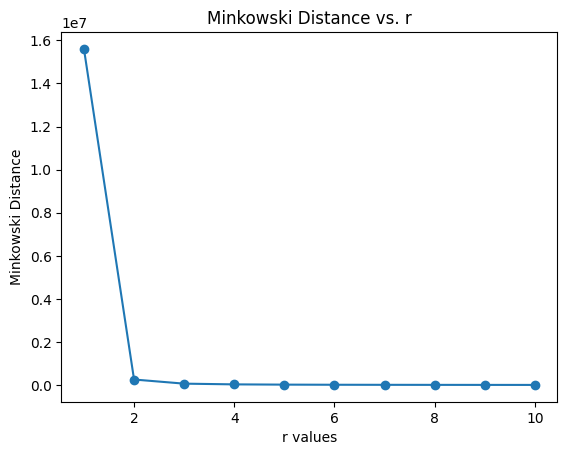

In [26]:
# Calculating Minkowski distances for different values of r

# Extract MonthlyCharges and TotalCharges values from df_final
a = df_final['MonthlyCharges'].values
b = df_final['TotalCharges'].values

distances = [] # Initialize an empty list to store Minkowski distances for different values of r
r_values = list(range(1, 11)) # Define a range of r values from 1 to 10

for r in r_values:
    distance = np.power(np.sum(np.abs(a - b) ** r), 1/r) # Calculate the Minkowski distance using the formula
    distances.append(distance) # Append the calculated distance to the list

# Plot the distances against the values of r
plt.plot(r_values, distances, marker='o')
plt.xlabel('r values')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.show()

**A4**

In [28]:
from sklearn.model_selection import train_test_split
# Assuming 'df_final' is your DataFrame with the entire dataset
# Assuming 'target_column' is the column you want to predict (replace it with the actual target column)
target_column = 'Churn_Yes'

# Extract features (X) and target variable (y)
X = df_final.drop(target_column, axis=1)  # Features
y = df_final[target_column]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

**A5**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

**A6**

In [30]:
neigh.score(X_test, y_test)

0.8655074520936835

**A7**

In [31]:
neigh.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

**A8**

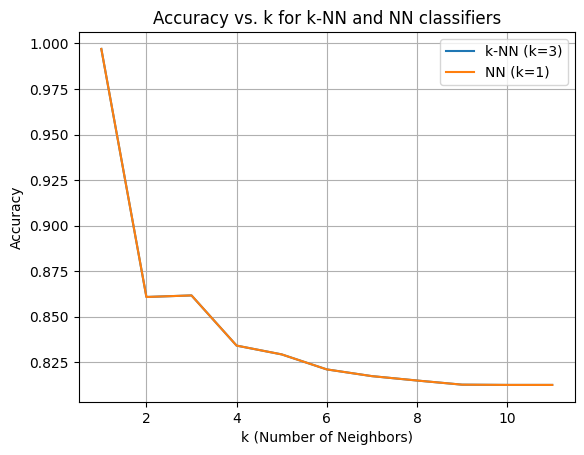

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors

target_column = 'Churn_Yes'

# Extract features (X) and target variable (y)
X_train, X_test = df_final.drop(target_column, axis=1), df_final.drop(target_column, axis=1)
y_train, y_test = df_final[target_column], df_final[target_column]

# Lists to store accuracy for different values of k
accuracy_k_nn = []
accuracy_nn = []

# Vary k from 1 to 11
k_values = list(range(1, 12))

for k in k_values:
    # k-NN classifier
    k_nn_classifier = KNeighborsClassifier(n_neighbors=k)
    k_nn_classifier.fit(X_train, y_train)
    y_pred_k_nn = k_nn_classifier.predict(X_test)
    accuracy_k_nn.append(accuracy_score(y_test, y_pred_k_nn))

    # Nearest Neighbors classifier
    nn_classifier = NearestNeighbors(n_neighbors=k)
    nn_classifier.fit(X_train)
    _, indices = nn_classifier.kneighbors(X_test)
    y_pred_nn = [np.argmax(np.bincount(y_train.iloc[idx])) for idx in indices]
    accuracy_nn.append(accuracy_score(y_test, y_pred_nn))

# Plot the accuracy for different values of k
plt.plot(k_values, accuracy_k_nn, label='k-NN (k=3)')
plt.plot(k_values, accuracy_nn, label='NN (k=1)')
plt.title('Accuracy vs. k for k-NN and NN classifiers')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**A9**

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Create k-NN classifier and fit it to the training data
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# Confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):")
print(conf_matrix_train)

# Precision, Recall, and F1-Score for training data
precision_train = precision_score(y_train, y_train_pred, average='binary')
recall_train = recall_score(y_train, y_train_pred, average='binary')
f1_train = f1_score(y_train, y_train_pred, average='binary')

print("\nPrecision (Training Data):", precision_train)
print("Recall (Training Data):", recall_train)
print("F1-Score (Training Data):", f1_train)

# Confusion matrix for testing data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Testing Data):")
print(conf_matrix_test)

# Precision, Recall, and F1-Score for testing data
precision_test = precision_score(y_test, y_test_pred, average='binary')
recall_test = recall_score(y_test, y_test_pred, average='binary')
f1_test = f1_score(y_test, y_test_pred, average='binary')

print("\nPrecision (Testing Data):", precision_test)
print("Recall (Testing Data):", recall_test)
print("F1-Score (Testing Data):", f1_test)

# Accuracy for training and testing data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nAccuracy (Training Data):", accuracy_train)
print("Accuracy (Testing Data):", accuracy_test)

Confusion Matrix (Training Data):
[[4825  349]
 [ 625 1244]]

Precision (Training Data): 0.7809165097300691
Recall (Training Data): 0.6655965757089353
F1-Score (Training Data): 0.7186597342576546

Confusion Matrix (Testing Data):
[[4825  349]
 [ 625 1244]]

Precision (Testing Data): 0.7809165097300691
Recall (Testing Data): 0.6655965757089353
F1-Score (Testing Data): 0.7186597342576546

Accuracy (Training Data): 0.861706659094136
Accuracy (Testing Data): 0.861706659094136


**Optional Section**

**O1**

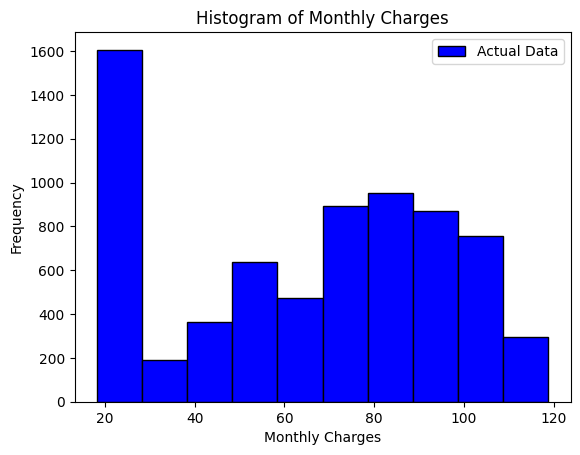

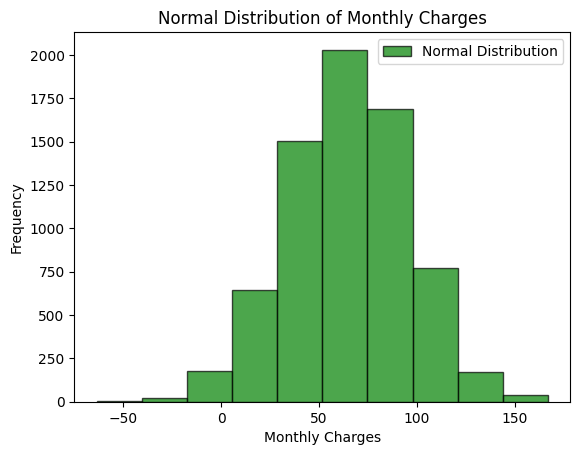

Mean Monthly Charges: 64.76169246059918
Standard Deviation of Monthly Charges: 30.087910854936975


In [37]:
# Extract monthly charges data
monthly_charges_data = df_final['MonthlyCharges'].tolist()

# Calculating mean and standard deviation for MonthlyCharges
mean_monthly_charges = np.mean(monthly_charges_data)
std_dev_monthly_charges = np.std(monthly_charges_data)

# Generating normal distribution data for MonthlyCharges
normal_distribution_data = np.random.normal(mean_monthly_charges, std_dev_monthly_charges, len(monthly_charges_data))

# Plot histogram
plt.hist(monthly_charges_data, bins=10, color='blue', edgecolor='black', label='Actual Data')
plt.title('Histogram of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot normal distribution
plt.hist(normal_distribution_data, bins=10, color='green', edgecolor='black', alpha=0.7, label='Normal Distribution')
plt.title('Normal Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display mean and standard deviation
print(f"Mean Monthly Charges: {mean_monthly_charges}")
print(f"Standard Deviation of Monthly Charges: {std_dev_monthly_charges}")

**O2**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

target_column = 'Churn_Yes'

# Extract features (X) and target variable (y)
X = df_final.drop(target_column, axis=1)  # Features
y = df_final[target_column]  # Target variable

# Split the dataset into 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Defining kNN classifier with different distance metric
neigh_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')  # Manhattan distance
neigh_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')  # Euclidean distance
neigh_minkowski = KNeighborsClassifier(n_neighbors=3, metric='minkowski')  # Minkowski distance (default)
neigh_hamming = KNeighborsClassifier(n_neighbors=3, metric='hamming')  # Hamming distance

# Fit the models
neigh_manhattan.fit(X_train, y_train)
neigh_euclidean.fit(X_train, y_train)
neigh_minkowski.fit(X_train, y_train)
neigh_hamming.fit(X_train, y_train)

# Predict on the test set
y_pred_manhattan = neigh_manhattan.predict(X_test)
y_pred_euclidean = neigh_euclidean.predict(X_test)
y_pred_minkowski = neigh_minkowski.predict(X_test)
y_pred_hamming = neigh_hamming.predict(X_test)

# Evaluate and print accuracy for each metric
print(f"Accuracy (Manhattan): {accuracy_score(y_test, y_pred_manhattan)}")
print(f"Accuracy (Euclidean): {accuracy_score(y_test, y_pred_euclidean)}")
print(f"Accuracy (Minkowski): {accuracy_score(y_test, y_pred_minkowski)}")
print(f"Accuracy (Hamming): {accuracy_score(y_test, y_pred_hamming)}")

Accuracy (Manhattan): 0.7647267565649397
Accuracy (Euclidean): 0.7633073101490419
Accuracy (Minkowski): 0.7633073101490419
Accuracy (Hamming): 0.7384669978708304


**O3**

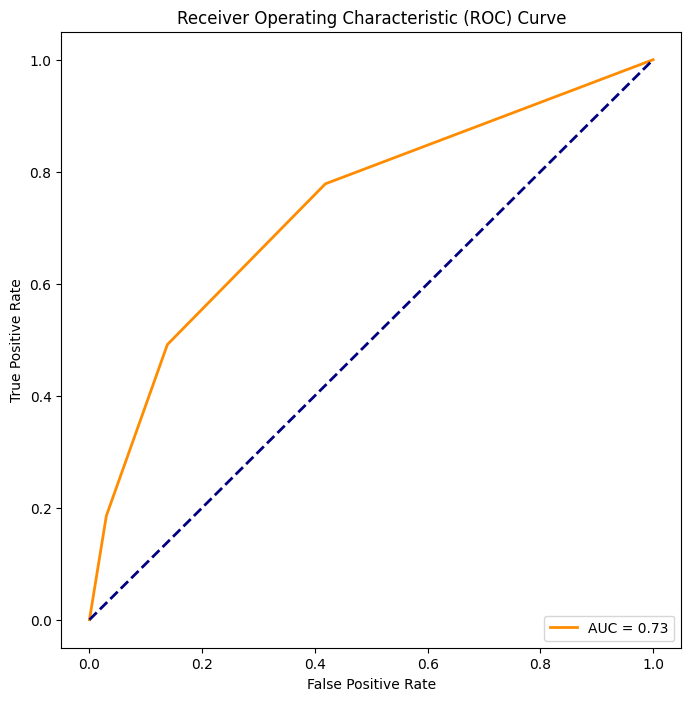

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

target_column = 'Churn_Yes'

# Extract features (X) and target variable (y)
X = df_final.drop(target_column, axis=1)  # Features
y = df_final[target_column]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Define kNN classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = neigh.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()